<a href="https://colab.research.google.com/github/Zaharanurf/Pemrograman-Python/blob/main/Zahara%20Nur%20Fikana_TUGAS11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
ls

 Classroom/          IMG_3063.JPG
'Colab Notebooks'/   IMG_3066.JPG
 dataset@            IMG_3071.JPG
 DriveSave/          IMG_3072.JPG
 godong.jpg          IMG_3077.JPG
 IMG_2995.JPG        IMG_3083.JPG
 IMG_2997.JPG        IMG_3088.JPG
 IMG_3034.JPG        IMG_3090.JPG
 IMG_3044.JPG        IMG_3100.JPG
 IMG_3053.JPG        IMG_3114.JPG
 IMG_3054.JPG        IMG_3118.JPG
 IMG_3059.JPG        LINE_Android-backup-chat165583028988.zip
'IMG_3063 (1).JPG'   pict/
'IMG_3063 (2).JPG'  'video jn'/


In [4]:
# import the necessary packages

from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense 
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [5]:
#grab all image paths in the input dataset directory, then initialize

# our list of images and corresponding class labels 
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [6]:
# loop over our input images

for imagePath in imagePaths:
  # load the input image from disk, resize it to 128x128 pixels, scale 
  # the pixel intensities to the range [0, 1], and then update our
  # images list
  image = Image.open(imagePath)
  image = np.array(image.resize((128, 128))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the
  # labels list
  label = imagePath.split(os.path. sep)[-2] 
  labels.append(label)

In [7]:
print(labels)

['GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07',

In [8]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [10]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(1055, 128, 128, 3)
(352, 128, 128, 3)


In [11]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(12, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1440100   
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1

In [13]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=64)

[INFO] training network...
Epoch 1/25
17/17 [==============================] - 8s 476ms/step - loss: 0.2148 - accuracy: 0.9384 - val_loss: 1.2300 - val_accuracy: 0.6534
Epoch 2/25
17/17 [==============================] - 8s 472ms/step - loss: 0.0799 - accuracy: 0.9886 - val_loss: 1.1316 - val_accuracy: 0.6818
Epoch 3/25
17/17 [==============================] - 8s 469ms/step - loss: 0.0513 - accuracy: 0.9981 - val_loss: 1.1732 - val_accuracy: 0.6790
Epoch 4/25
17/17 [==============================] - 8s 468ms/step - loss: 0.0392 - accuracy: 1.0000 - val_loss: 1.1185 - val_accuracy: 0.7045
Epoch 5/25
17/17 [==============================] - 8s 469ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 1.1820 - val_accuracy: 0.6790
Epoch 6/25
17/17 [==============================] - 8s 468ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 1.1624 - val_accuracy: 0.6989
Epoch 7/25
17/17 [==============================] - 8s 470ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 1.2127 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


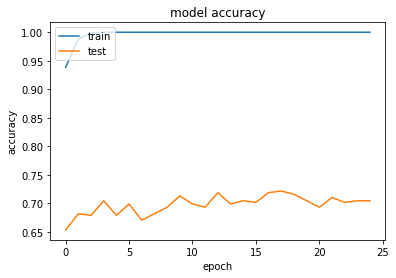

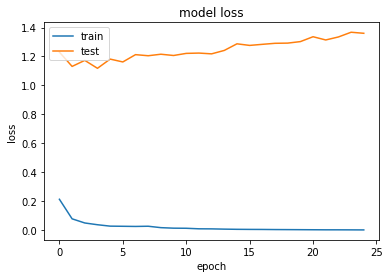

In [14]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)

[INFO] evaluating network...


In [16]:
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      GMB_01       0.67      0.64      0.65        28
      GMB_02       0.70      0.62      0.65        26
      GMB_03       0.72      0.77      0.74        30
      GMB_04       0.60      0.75      0.67        28
      GMB_05       0.71      0.74      0.73        27
      GMB_06       0.86      0.63      0.73        30
      GMB_07       0.73      0.63      0.68        43
      GMB_08       0.68      0.81      0.74        21
      GMB_09       0.79      0.74      0.77        31
      GMB_10       0.68      0.75      0.71        28
      GMB_11       0.62      0.61      0.62        33
      nonGMB       0.74      0.85      0.79        27

    accuracy                           0.70       352
   macro avg       0.71      0.71      0.71       352
weighted avg       0.71      0.70      0.70       352



In [17]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [18]:
import cv2
import matplotlib.pyplot as plt
image1='godong.jpg'

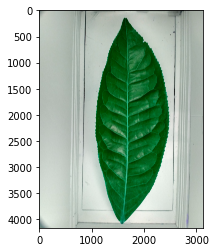

In [19]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [21]:
image_testing = Image.open ('godong.jpg')
image_testing = np.array(image_testing.resize((128,128))) / 255.0
image_testing.shape

(128, 128, 3)

In [22]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [23]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.9999738e-01 1.3158060e-06 1.7213640e-11 2.6445816e-22 4.7124193e-10
  4.0202369e-07 3.2448221e-11 8.8708219e-07 5.5229403e-09 2.9272217e-08
  1.4818388e-10 1.5480532e-14]]
['GMB_01']
